In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score

In [2]:
### loading the data set 
c_data=pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 15 Random Forest.inc\Company_Data.csv")

In [3]:
c_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


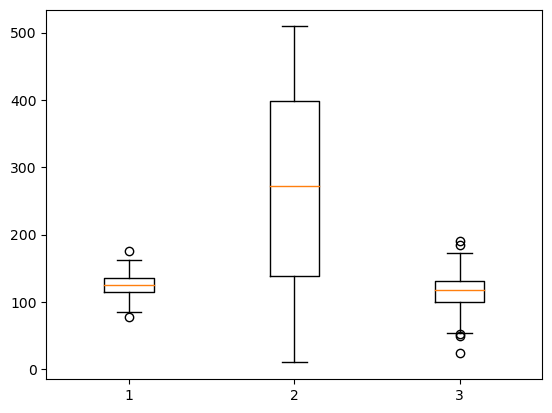

In [15]:
plt.boxplot(c_data[['CompPrice','Population','Price']]);


<Axes: >

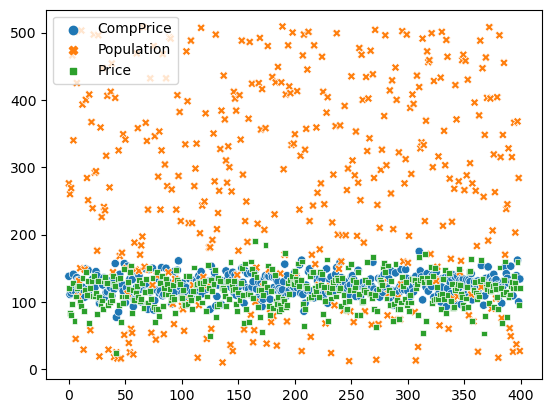

In [16]:
sns.scatterplot(c_data[['CompPrice','Population','Price']])

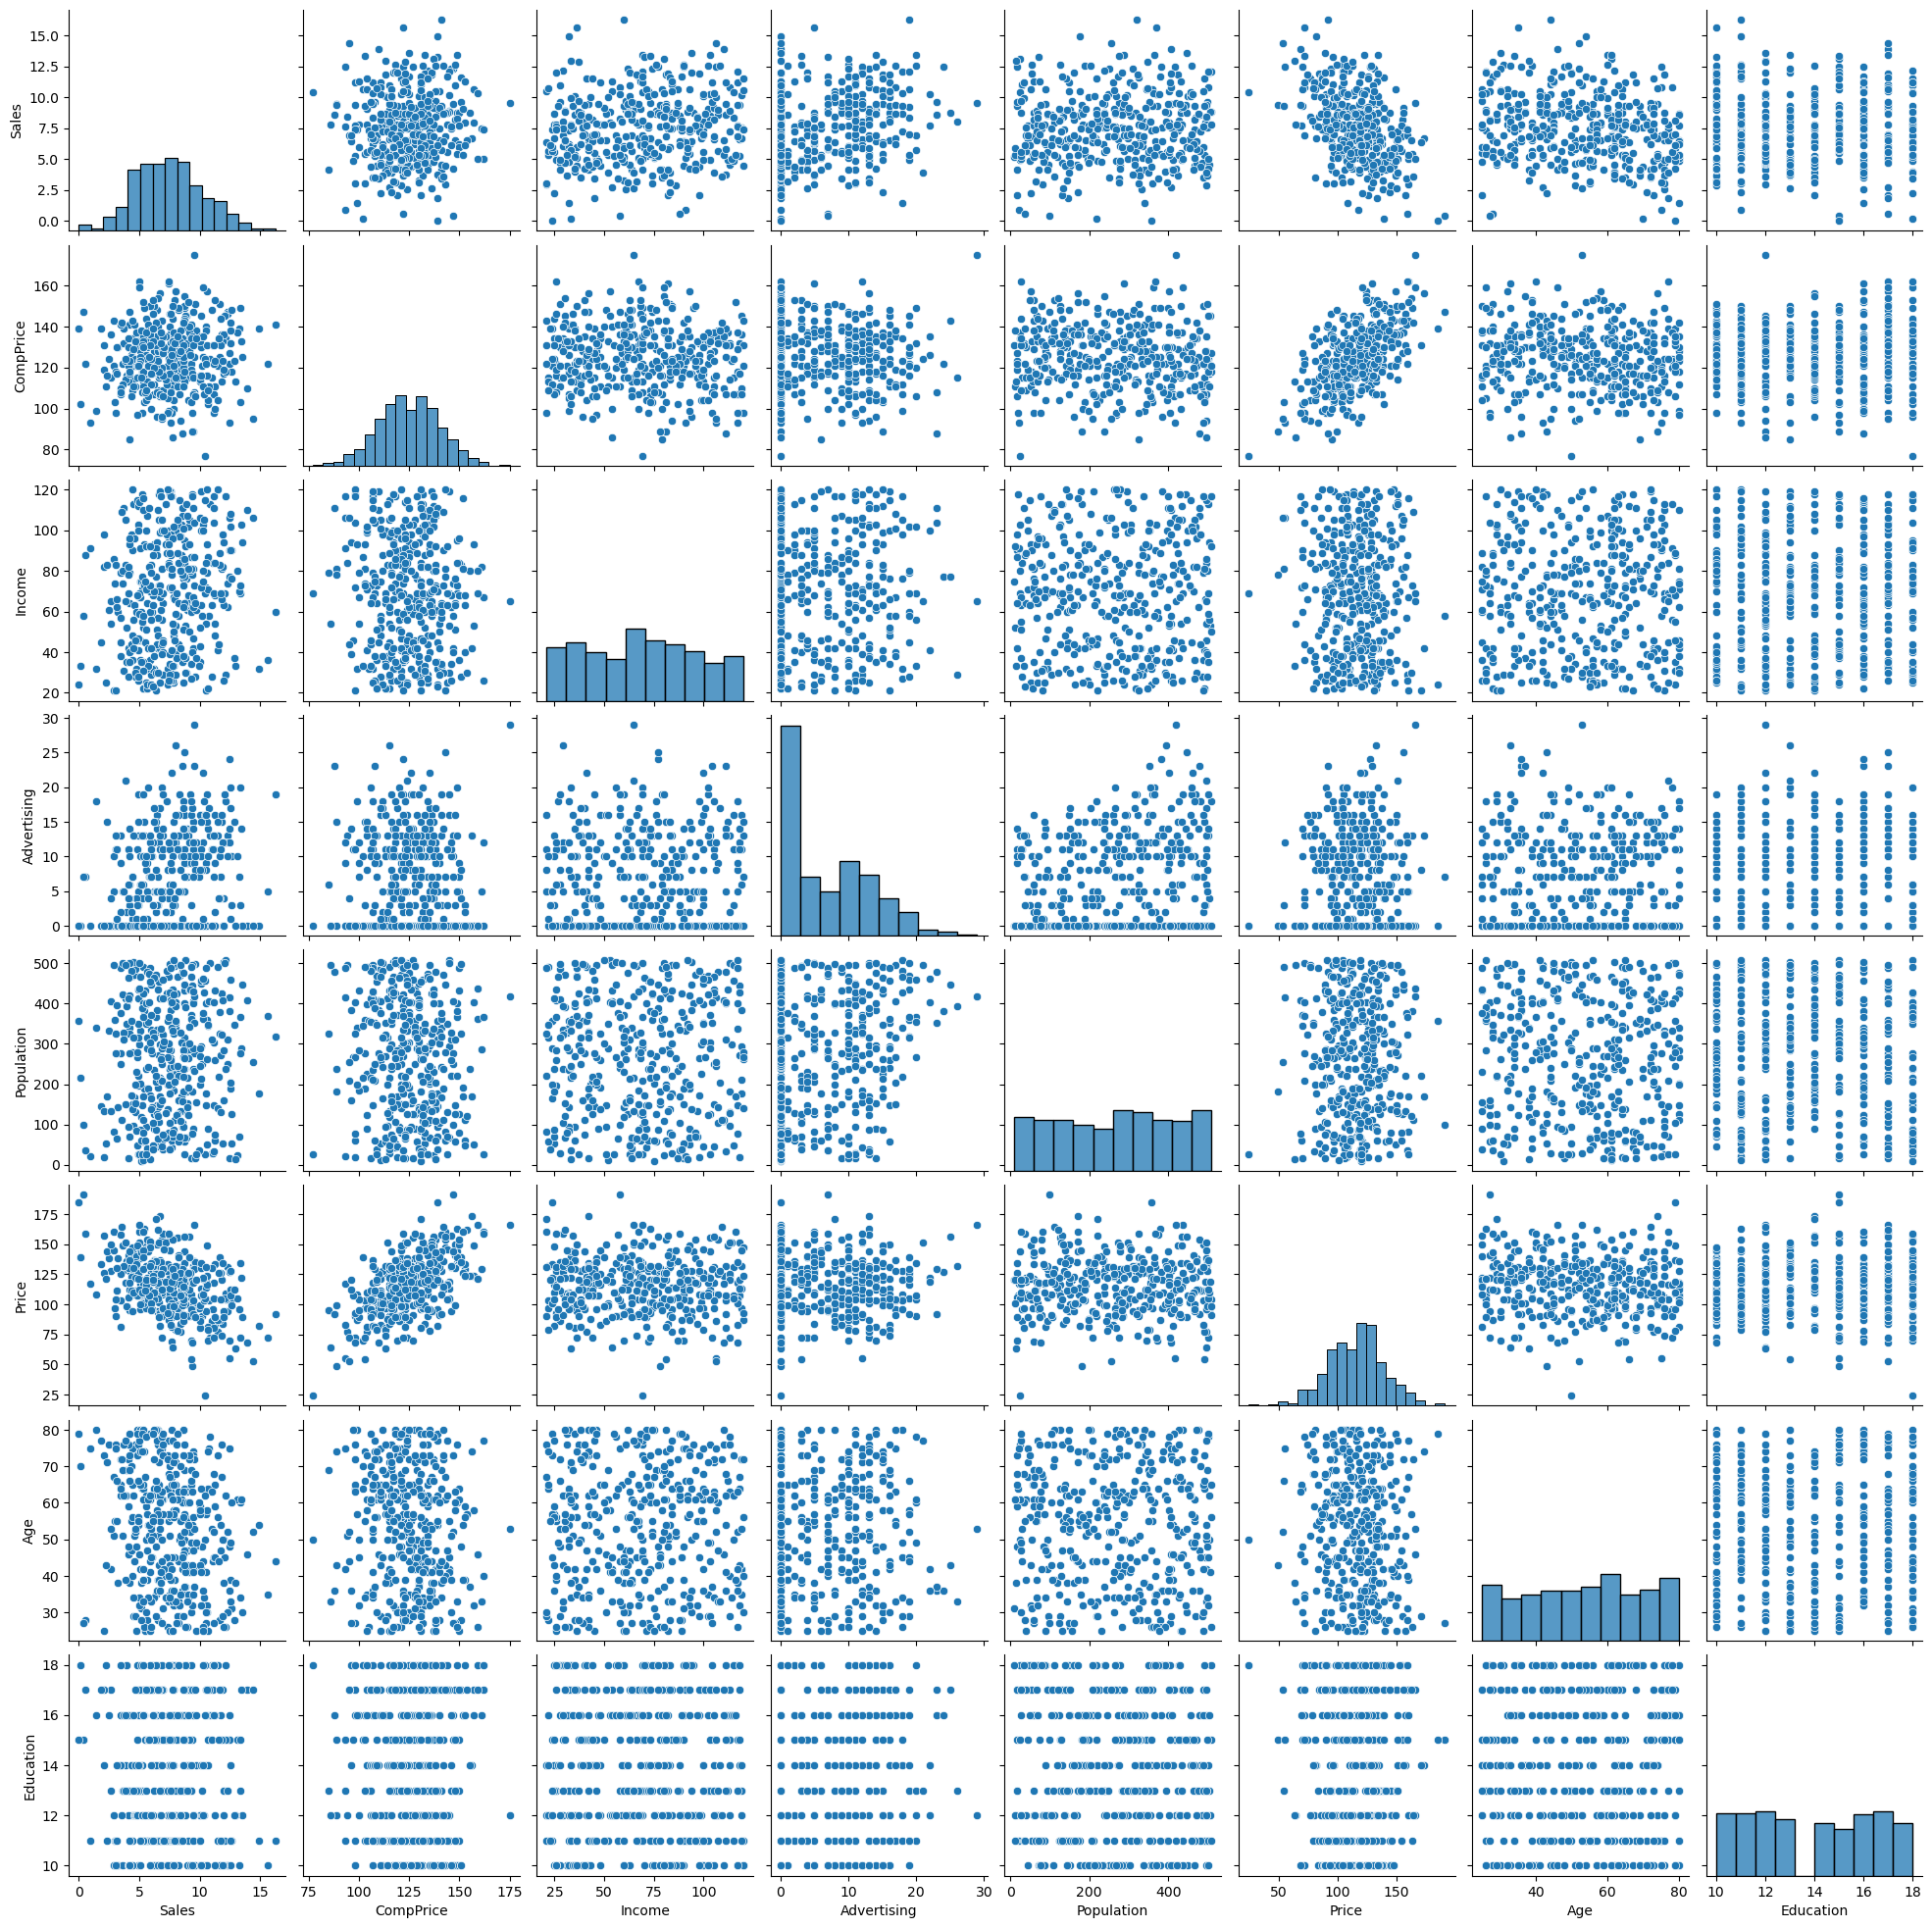

In [17]:
sns.pairplot(c_data)

In [5]:
c_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
c_data.shape

(400, 11)

In [8]:
## converting the variables
c_data_pro=pd.get_dummies(c_data)

In [9]:
c_data_pro

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [11]:
c_data_pro.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


In [13]:
#splitting the data into x and y 
x=c_data_pro.drop('Sales',axis=1)
y=c_data_pro['Sales']


In [21]:
array=x.values


In [38]:
df=pd.DataFrame(y)
df.head()


,Sales
0,9.50
1,11.22
2,10.06
3,7.40
4,4.15


In [40]:
df.max()

Sales    16.27
dtype: float64

In [54]:
df['lable']=pd.cut(x=df['Sales'],bins=[-1,5,10,15,20],labels=['normal_sales','good_sales','better_sales','extem_sales'])

In [55]:
df

,Sales,lable
0,9.50,good_sales
1,11.22,better_sales
2,10.06,better_sales
3,7.40,good_sales
4,4.15,normal_sales
...,...,...
395,12.57,better_sales
396,6.14,good_sales
397,7.41,good_sales
398,5.94,good_sales


In [58]:
y=df['lable']

In [59]:
y

0        good_sales
1      better_sales
2      better_sales
3        good_sales
4      normal_sales
           ...     
395    better_sales
396      good_sales
397      good_sales
398      good_sales
399      good_sales
Name: lable, Length: 400, dtype: category
Categories (4, object): ['normal_sales' < 'good_sales' < 'better_sales' < 'extem_sales']

In [60]:
## building the model 
model=RandomForestClassifier()

In [61]:
model.fit(x,y)

RandomForestClassifier()

In [62]:
model.score(x,y)

1.0

In [63]:
from sklearn.tree import plot_tree

In [65]:
model.feature_importances_

array([0.11027694, 0.11586035, 0.08579564, 0.11425961, 0.18640456,
       0.12828187, 0.07342153, 0.04202661, 0.05334994, 0.03781204,
       0.01246599, 0.01326121, 0.01270865, 0.01407508])

In [69]:
model.decision_path(x)

(<400x20082 sparse matrix of type '<class 'numpy.int64'>'
 	with 355263 stored elements in Compressed Sparse Row format>,
 array([    0,   223,   442,   631,   846,  1027,  1222,  1425,  1624,
         1835,  2014,  2213,  2412,  2613,  2814,  3039,  3230,  3439,
         3674,  3881,  4092,  4305,  4484,  4677,  4854,  5059,  5262,
         5461,  5662,  5859,  6052,  6227,  6420,  6623,  6836,  7045,
         7260,  7475,  7674,  7881,  8076,  8271,  8462,  8677,  8886,
         9089,  9324,  9531,  9756,  9963, 10154, 10367, 10590, 10791,
        10994, 11185, 11378, 11541, 11742, 11925, 12128, 12319, 12500,
        12703, 12892, 13069, 13282, 13503, 13684, 13897, 14090, 14279,
        14484, 14703, 14872, 15085, 15280, 15501, 15700, 15891, 16098,
        16295, 16512, 16689, 16920, 17119, 17294, 17499, 17688, 17877,
        18048, 18273, 18482, 18673, 18886, 19081, 19280, 19461, 19686,
        19861, 20082]))

In [71]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
### based on the feture importances 
 ## population, price,Advertising and income are causes high sale

In [75]:
### loading second data set

In [20]:
data=pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 15 Random Forest.inc\Fraud_check.csv")

In [21]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


<Axes: ylabel='Taxable.Income'>

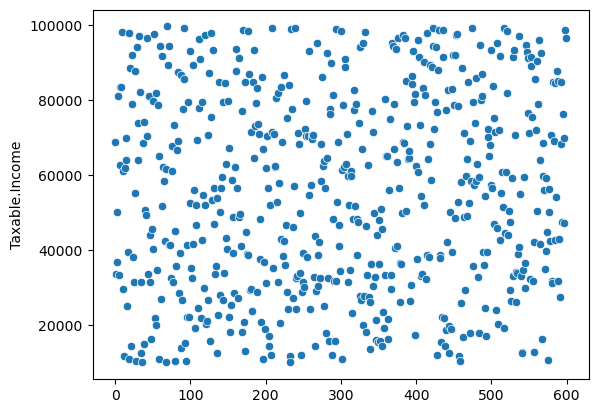

In [22]:
sns.scatterplot(data['Taxable.Income'])

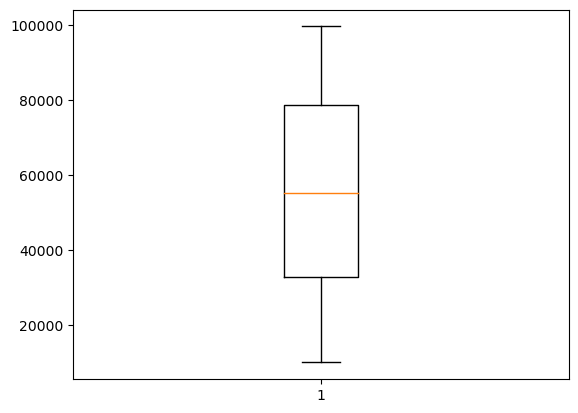

In [24]:
plt.boxplot(data['Taxable.Income']);

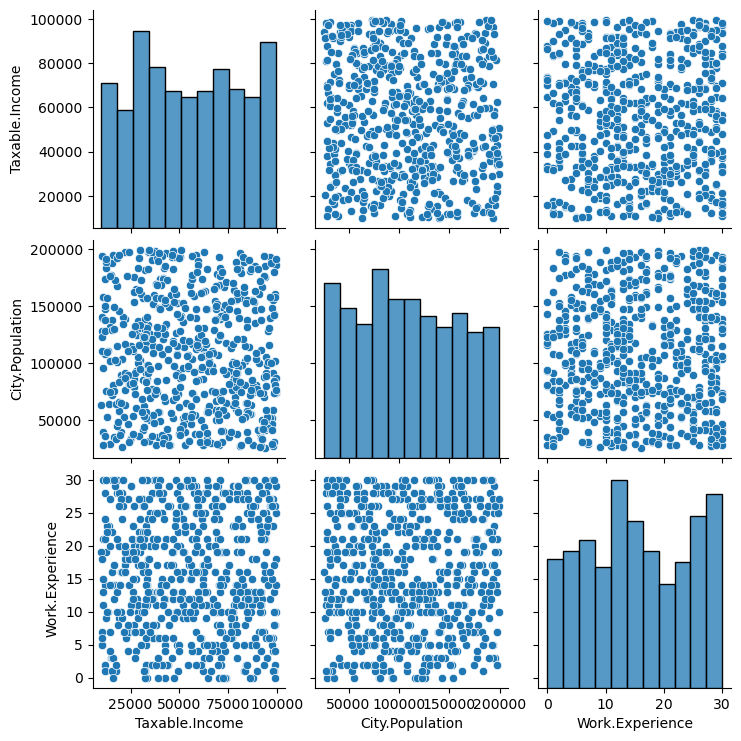

In [25]:
sns.pairplot(data)

In [78]:
### taking the y variable as the Taxble.incom

In [87]:
y=data[['Taxable.Income']]

In [88]:
y

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


In [89]:
y['lable']=pd.cut(x=y['Taxable.Income'],bins=[0,30001,2000000],labels=['risky','good'])

C:\Users\khsan\AppData\Local\Temp\ipykernel_12820\810543073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['lable']=pd.cut(x=y['Taxable.Income'],bins=[0,30001,2000000],labels=['risky','good'])


In [90]:
y

,Taxable.Income,lable
0,68833,good
1,33700,good
2,36925,good
3,50190,good
4,81002,good
...,...,...
595,76340,good
596,69967,good
597,47334,good
598,98592,good


In [91]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Taxable.Income  600 non-null    int64   
 1   lable           600 non-null    category
dtypes: category(1), int64(1)
memory usage: 5.5 KB


In [95]:
y['lable'].value_counts()

good     476
risky    124
Name: lable, dtype: int64

In [96]:
y_act=y['lable']

In [99]:
x=data.drop('Taxable.Income',axis=1)

In [101]:
x_data=pd.get_dummies(x)

In [102]:
x_data

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [103]:
#splitting the data into traing and testing data 

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_act,test_size=0.25,random_state=40)

In [106]:
##building the model
model1=RandomForestClassifier()

In [107]:
model1.fit(x_train,y_train)

RandomForestClassifier()

In [109]:
model1.score(x_train,y_train)

1.0

In [111]:
model1.score(x_test,y_test)

0.7066666666666667

In [182]:
## let us imporove the hyper parameter
model2=RandomForestClassifier(n_estimators=40,max_depth=6)

In [183]:
model2.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=40)

In [184]:
model2.score(x_train,y_train)

0.8133333333333334

In [185]:
model2.score(x_test,y_test)

0.76